# **Hotel Booking Cancellation Prediction - Classification and Hypothesis Testing **


---------------
## **Project Problem Statements**

### **Context**

The landscape of hotel bookings has been significantly influenced by cancellations and no-shows, which constitute a substantial portion of reservations. Reasons for cancellations vary widely and include changes in plans, scheduling conflicts, or unforeseen circumstances. The flexibility offered to consumers when booking hotel rooms, often allowing cancellations free of charge or at a nominal fee,and has become the standard practice globally. While this is advantageous for consumers, this flexibility presents significant challenges for hotels, as last-minute cancellations can lead to substantial revenue losses.

Moreover, the emergence of new online booking platforms has revolutionized booking possibilities and customer behavior. Traditional patterns and guest characteristics no longer solely dictate cancellation trends, as these platforms offer unprecedented booking flexibility and options. This dynamic landscape adds complexity to how hotels manage cancellations, requiring innovative strategies and insights to mitigate revenue losses and optimize occupancy rates.



This pattern of cancellations of bookings impacts a hotel on various fronts:
1. **Loss of resources (revenue)** when the hotel cannot resell the room leading to a waste of resources with no return on cost.
2. **Lowering prices last minute**, so the hotel can resell a room, resulting in reducing the profit margin.
3. **Human resources to make arrangements** for the guests.

### **Objective**

Analyse the data and create meanigful insights into the data and Developing a machine learning model that can help in predicting which booking is likely to be canceled.For this model we will be using a dataset from INN Hotels Group - Portugal. Our model will analyze the data provided to find which factors have a high influence on booking cancellations,as well as building a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds. We


### **Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below:


**Data Dictionary**

* **Booking_ID:** Unique identifier for each booking
* **no_of_adults:** Number of Adults
* **no_of_children:** Number of Children
* **no_of_weekend_nights:** Number of weekend nights (Saturday/Sunday) the guest stayed/booked to stay at the hotel
* **no_of_week_nights:** Number of weekday nights (Monday to Friday) the guest stayed/booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled/not cancelled.

# Import the libraries required**

In [1]:
# Libraries for reading/manipulating data
import pandas as pd
import numpy as np

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Machine Learning models required from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import warnings;
import numpy as np
warnings.filterwarnings('ignore')

# functions required from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder


# getting diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer



## **Loading the dataset**

In [2]:
hotel = pd.read_csv("INNHotelsGroup (3).csv")

In [3]:
# Copying data to another variable to avoid changes to original data
data = hotel.copy()

## **Overview of the dataset**

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`,, `room_type_reserved`, `market_segment_type`, `booking_status`  `type_of_meal_plan` are of object type while rest columns are numeric.

* There are no null values in this dataset.

In [8]:
data.duplicated().sum()

0

 There are no duplicate values in the data.

Dropping the unique values column as a column with unique values will mostly have no predictive power for the current Machine Learning problem.

In [9]:
data = data.drop(["Booking_ID"], axis=1)

In [10]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**Statistical summary of the data.**

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


There are 36275 entries and 19 data points with no duplicate values or missing values.

Data for arrival year is only between 2017 and 2018.
mean no. of adults is 1.85,min:0,max:4
mean no. of children is 0.10,min:0,max:10
mean no. of weekend nights is 0.81,min:0,max:7
mean no. of weeknights is 2.20,min:0,max:17

The difference in the mean and median of lead_time is quite big,as there is an outlier(the highest value is 443 days)
The average price per room is within 99.45 for at 50% of bookings, however there are some outliers with extreme values with the highest price being 540.The number of special requests for the vast majority of booking also seems to be 0 with the highest number of requests being 5. Most customers who make a booking also do not have any previous cancellations with the highest being 13(outlier).**


## **Exploratory Data Analysis**

# **Univariate Analysis**

we define a **hist_box() function** that provides a boxplot and a histogram in the same visual diagram, we can use this to perform a univariate analysis on the columns of this dataset.

In [12]:
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

#### **  Histogram and box plot for the variable `Lead Time` using the hist_box function**

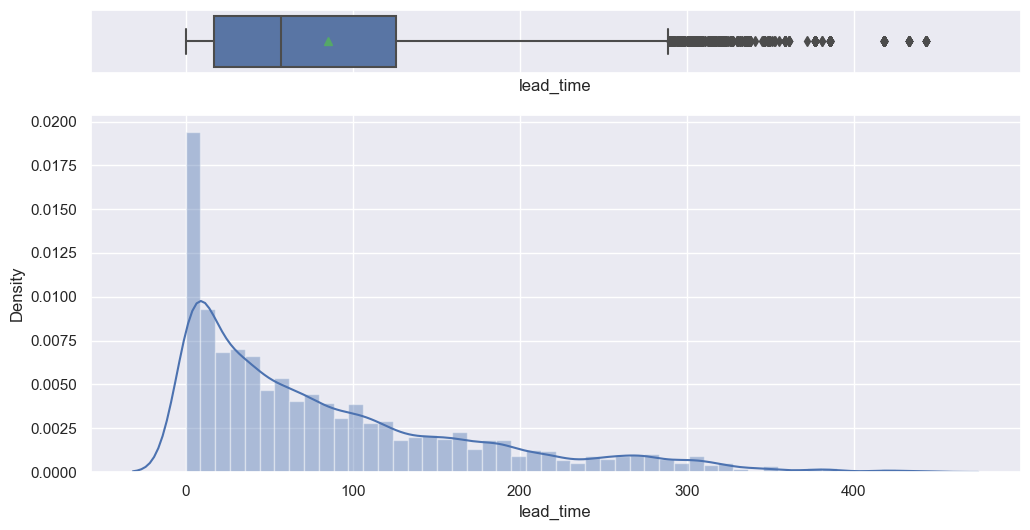

In [13]:
hist_box(data,'lead_time') 

The box plot suggests there are many outliers on the right.
the distribution for the lead time is right skewed.

The majority of lead times is under 126.
The distribution for the lead time shows that the values range from 0 to almost 380

**The Histogram and box plot for the variable `Average Price per Room` using the hist_box function**

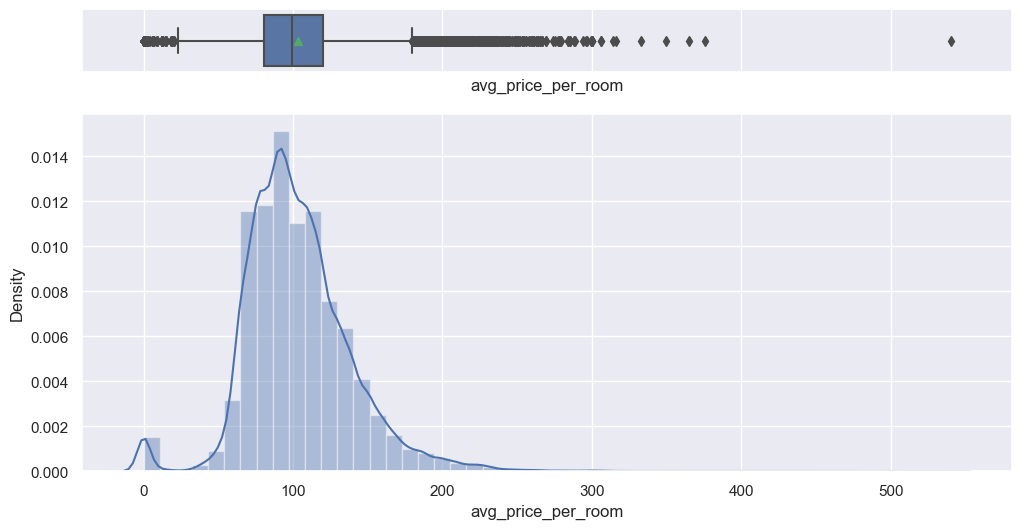

In [14]:
hist_box(data,'avg_price_per_room')

There are a few observations to the left and right of the boxplot as well as an extreme value that is an outlier on the right.
The average price of the room decreases gradually after reaching the highest value.
The mean and median for the average price are close at 100.
the distribution for the average price of the room ranges from 0(complemetory bookings) to almost 375.
majority of the prices range from around 80.30 to 120.00.

**Interestingly some rooms have a price equal to 0. Let's check them.**

In [15]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [16]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [17]:
Q1 = data["avg_price_per_room"].quantile(0.25)


Q3 = data["avg_price_per_room"].quantile(0.75)

IQR = Q3 - Q1

Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [18]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Distribution of the categorical variables**

**Number of Children**

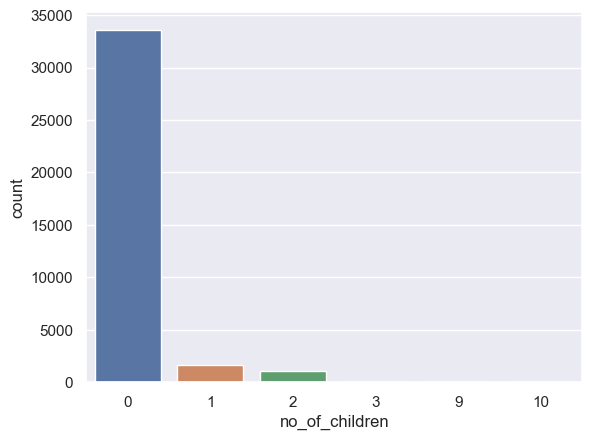

In [19]:
sns.countplot(data['no_of_children'])
plt.show()

In [20]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

* Customers were not travelling with children in 93% of the cases.
* There exists some values in the data where the number of children is 9 or 10, which is unlikely and maybe erroneous. 
* As a result We will replace these values with the maximum value of 3 children.

In [21]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Arrival Month**

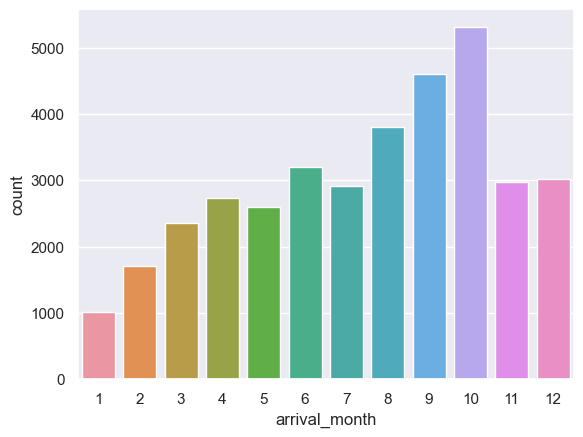

In [22]:
sns.countplot(data["arrival_month"])
plt.show()

In [23]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

* October is the busiest month for hotel arrivals followed by September and August. **Over 35% of all bookings**, as we see in the above table, were for one of these three months.
* Around 14.7% of the bookings were made for an October arrival.

**Booking Status**

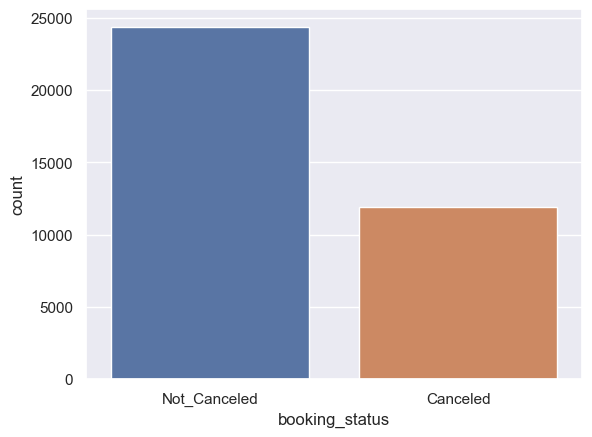

In [24]:
sns.countplot(x="booking_status", data=data)
plt.show()

In [25]:
data['booking_status'].value_counts(normalize=True)


Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

* 32.8% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [26]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### ** Bivariate Analysis**

#### **Visualizing the correlation matrix using a heatmap**



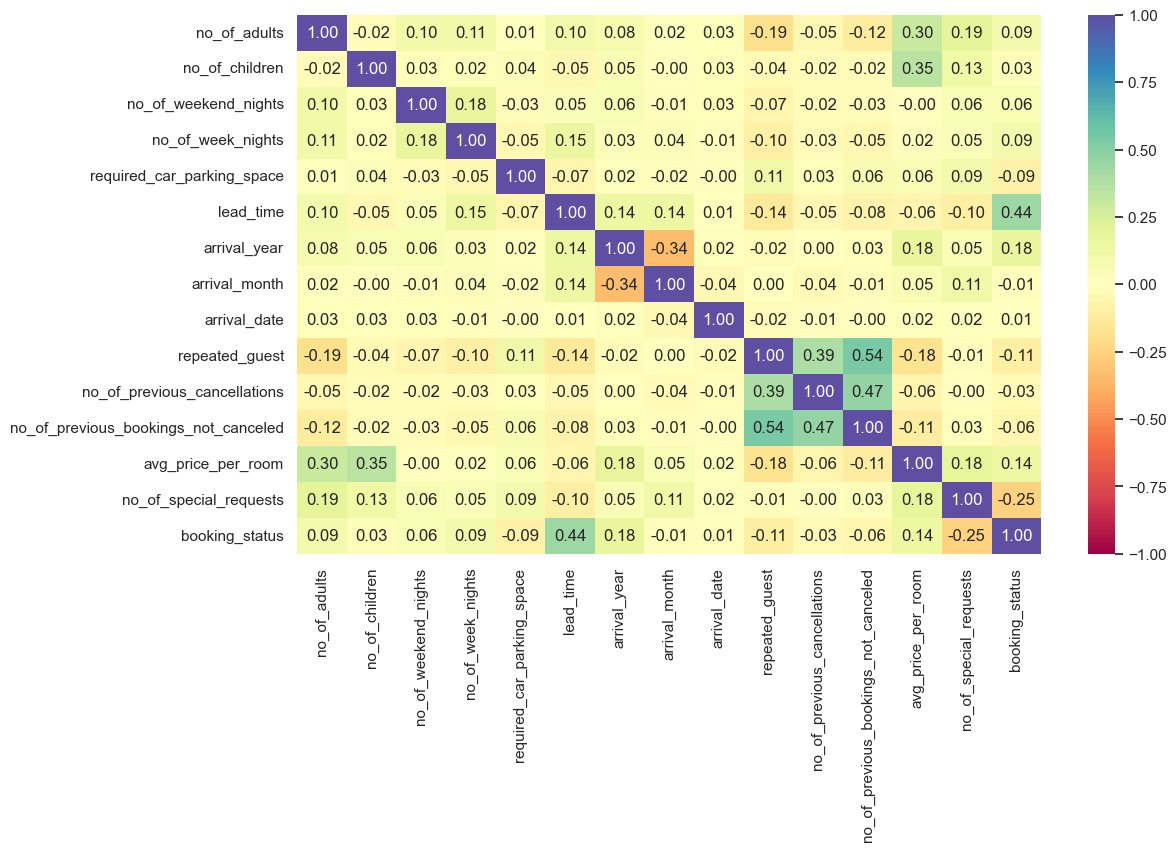

In [27]:
#cols_list = data.select_dtypes(include=np.number).columns.tolist()

#plt.figure(figsize=(12, 7))
#sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f',cmap="Spectral")
#plt.show()
#worked for you but it was showing error for me so I just changed the code to the below one, i believe same results

# Select only numerical columns
numeric_data = data.select_dtypes(include=np.number)

# Generate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap="Spectral")
plt.show()

**
Most of the data points have minimal to no correlation with each other.
The [number of previous bookings not cancelled] and [repeated guests] have the highest postive correlation,this makes sense as repeated guests may having brand loyalty/prefernce and less likely to cancel bookings.
Booking status and lead time also have a positive correlation.The average price of room with number of adults/number of children have weak positive correlation. The number of special requests and booking status have a weak negetive correlation.**


**Hotel rates are dynamic and changes according to demand and customer demographics.This visualizes how prices vary across different market segments**

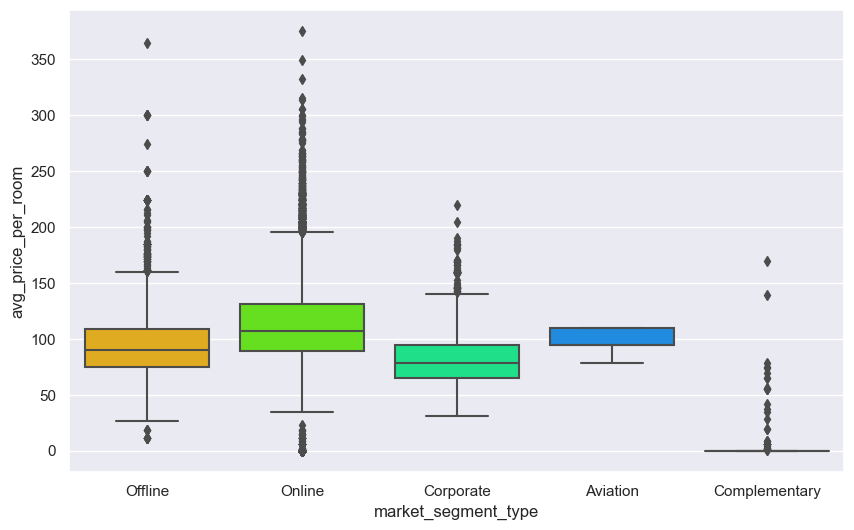

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Rooms booked online have a high variation in prices.
* The offline and corporate room prices are very similar.
* Complimentary market segment gets the rooms at very low prices, which is sensible.

Defining a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

In [29]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

#### **Stacked barplot for the variable `Market Segment Type` against the target variable `Booking Status` using the stacked_barplot  function **

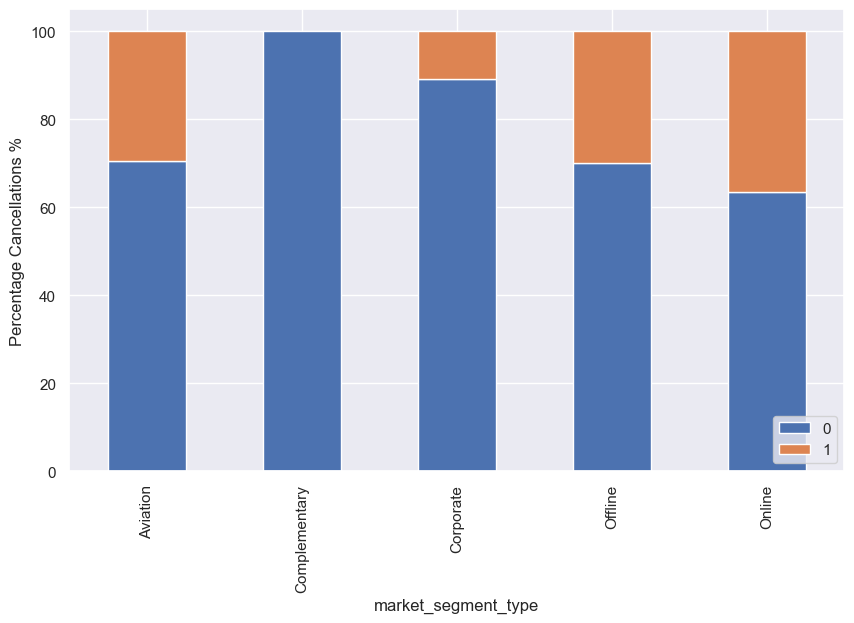

In [30]:
stacked_barplot(data,'market_segment_type','booking_status')

**
The graph suggests online and aviation markets have the highest cancellations. Offline is not far back. Aviation cancellation may correspond to flight cancellations as flights get cancelled time to time on a reglar basis.The hotel should look into developing packages for the aviation market (Sell at higher price but offer complimentory cancellations).

Complimentory bookings are almost never cancelled as they are essentially free.Corporate has a low cancellation rate compared to other segments so hotels should look into developing packages for corporate customers.**


#### ** Stacked barplot for the variable `Repeated Guest` against the target variable `Booking Status` using the stacked_barplot  function.**

Repeating guests are the guests who stay in the hotel often and are important to brand equity.

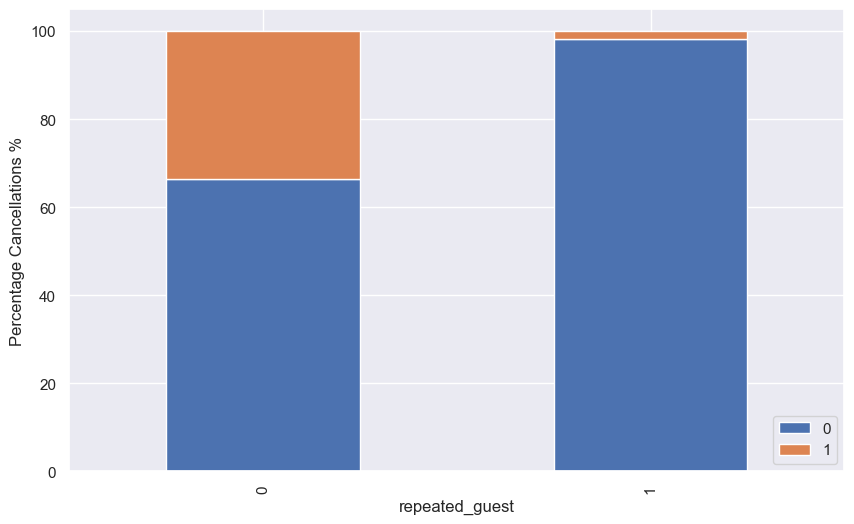

In [31]:
stacked_barplot(data,'repeated_guest','booking_status')

**
Repeated guests may be loyal to the brand which may be the reason they are less likely to cancel their booking.
**


**Analyzing customer who stayed for at least a day at the hotel.**

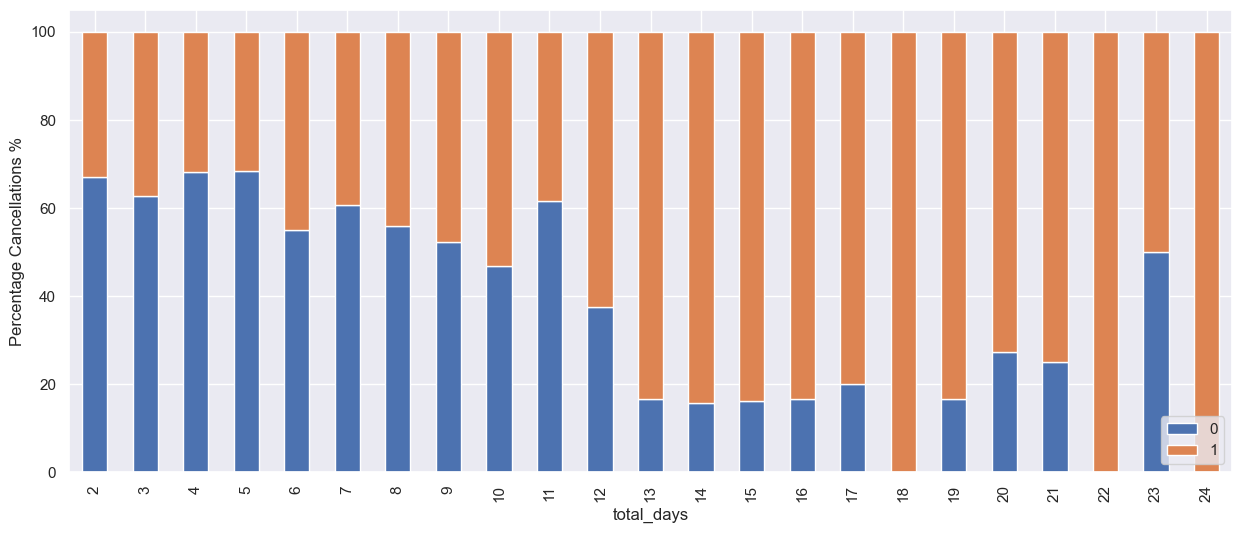

In [32]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

Although there are only two bookings with a total of 23 days, one being Not_cancelled and the other Cancelled, removing these data points may not be justified due to the limited sample size. Additionally, it's noteworthy that the cancelled booking is a corporate booking which may not be attributable to consumer interests. 

However, for the sake of analyzing the general trend, we have chosen to exclude this specific data point from the graph below.

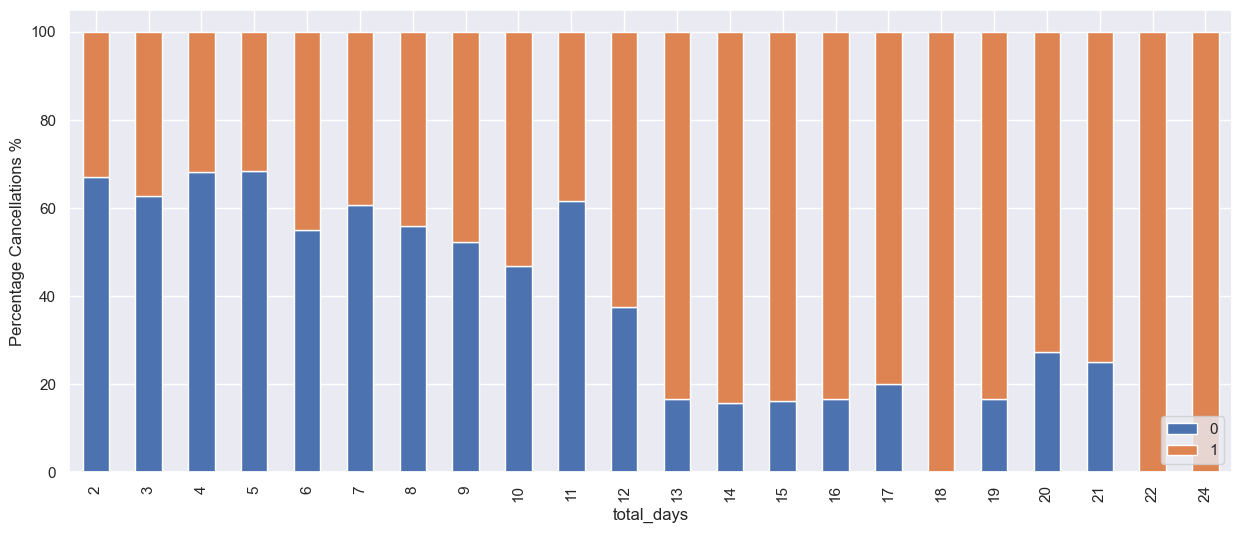

In [33]:
# Drop the outlier where total_days is equal to 23
stay_data = stay_data[stay_data["total_days"] != 23]

# Plot the stacked bar plot
stacked_barplot(stay_data, "total_days", "booking_status", figsize=(15, 6))

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

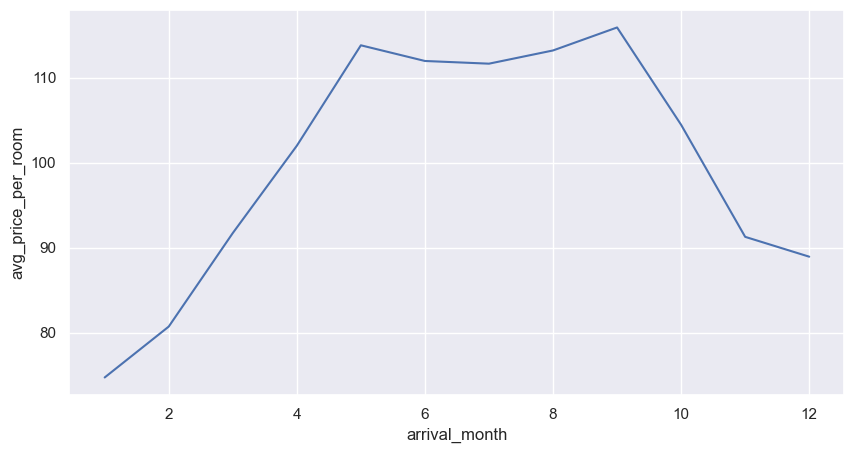

In [34]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## **Data Preparation for Modeling**

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Separating the independent variables (X) and the dependent variable (Y)**

In [35]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [36]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [37]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### **Which case is more important?** 

Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose its resources and will have to bear additional costs of distribution channels with no making back the cost born directly.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage brand trust/value and equity. 



#### **How to reduce the losses?**

* The hotel would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

**This is a function to calculate and print the classification report and confusion matrix to avoid repetitive code repeatedly for each model.**

In [38]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the models**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**

### **Logistic Regression**

#### **Build a Logistic Regression model**

In [39]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

#### **Check the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       0.82      0.89      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.80     25392



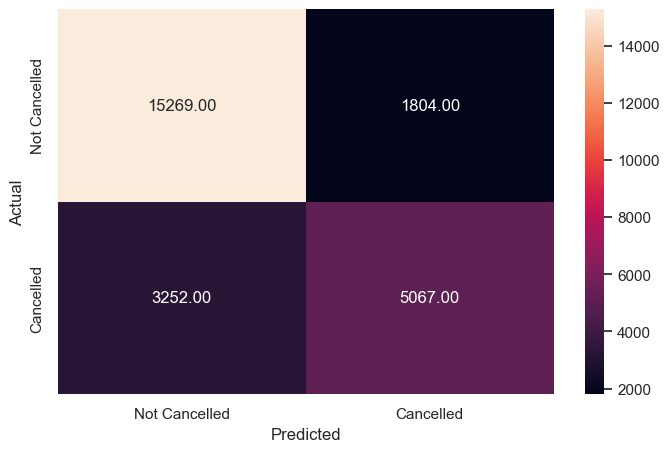

In [40]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

In [41]:
cm_train_dt = confusion_matrix(y_train, y_pred_train)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.6090876307248467
False Positive Rate (FPR): 0.10566391378199497


**
We are getting an accuracy of around 80% on train dataset.
the recall for this model is around 0.61  for class 1 on train.
As we can see from the Confusion Matrix, this model fails to identify the majority of guests who will or will not cancel their booking succusfully.
**


              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7317
           1       0.73      0.60      0.66      3566

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.79      0.79      0.79     10883



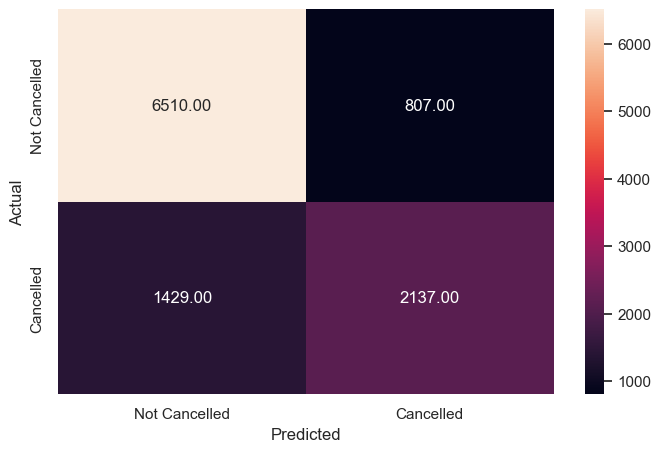

In [42]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

In [43]:
cm_test_dt = confusion_matrix(y_test, y_pred_test)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.5992708917554683
False Positive Rate (FPR): 0.11029110291102912


**
We are getting an accuracy of around 79% on test dataset.
However, the recall for this model is around 0.60 for class 1 on test.
As the recall is low, this model will not perform well in differentiating guests who have a high chance of canceelling or not cancelling their guests.
As we can see from the Confusion Matrix, this model fails to identify the majority of guests who cancels or do not cancel their ticket successfully.

** 


#### ** Optimal threshold for the model using the Precision-Recall Curve.**

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**


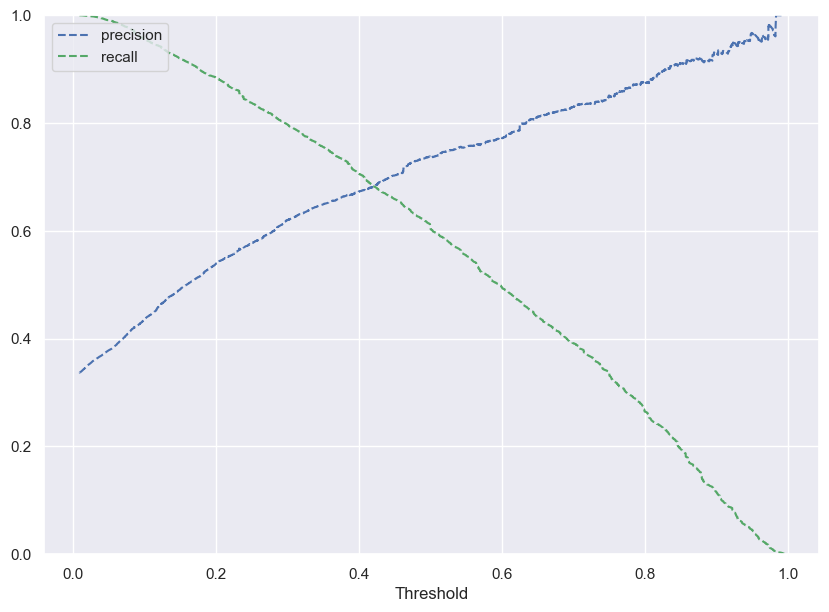

In [44]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**0.425**


In [45]:
# Setting the optimal threshold
optimal_threshold = 0.425

#### ** Checking the performance of the model on train and test data using the optimal threshold.**

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     17073
           1       0.69      0.68      0.68      8319

    accuracy                           0.79     25392
   macro avg       0.77      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



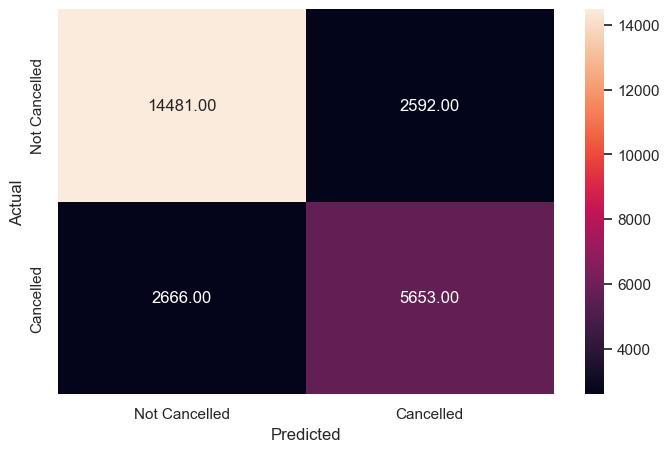

In [46]:
# Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

In [47]:
cm_train_dt = confusion_matrix(y_train, y_pred_train[:,1]>optimal_threshold)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.6795287895179709
False Positive Rate (FPR): 0.1518186610437533


**
The model performance has improved and the recall has increased for class 1 to 0.68.
**


**checking the performance on the test set**

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7317
           1       0.68      0.67      0.67      3566

    accuracy                           0.79     10883
   macro avg       0.76      0.76      0.76     10883
weighted avg       0.79      0.79      0.79     10883



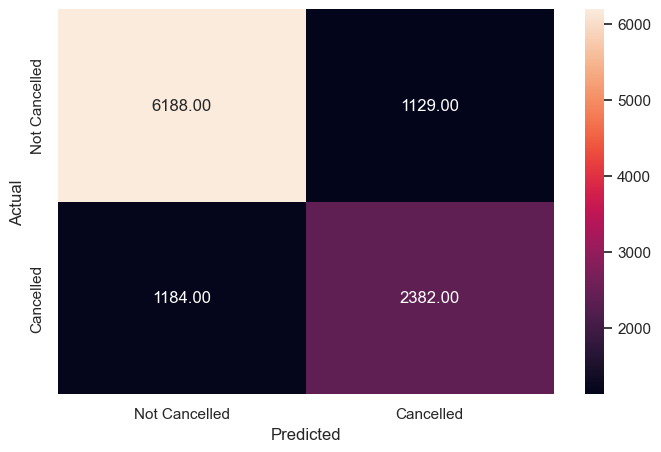

In [48]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

In [49]:
cm_test_dt = confusion_matrix(y_test, y_pred_test[:,1]>optimal_threshold)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.6679753224901851
False Positive Rate (FPR): 0.15429820964876315


**
The model performance has similar performence. The recall has increased significantly for class 1 to 0.67,although the precision has decreased.
**


### **Support Vector Machines**

To accelerate SVM training, let's scale the data for support vector machines.

In [50]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**



#### ** Build a Support Vector Machine model using a linear kernel**

**Scaled data for modeling Support Vector Machine**

In [51]:
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X=X_train_scaled, y = y_train)

#### ** Checking the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



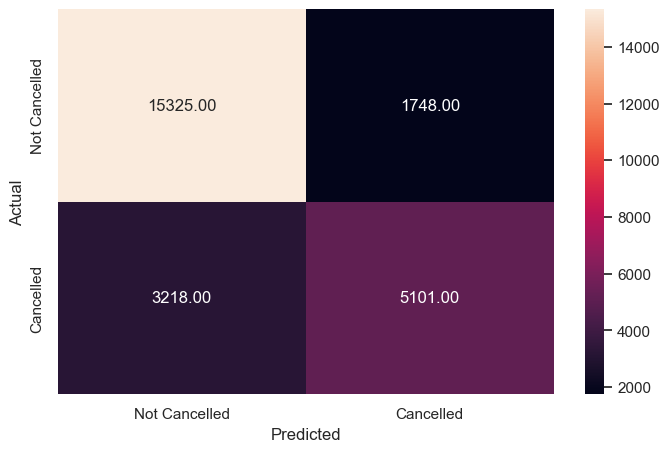

In [52]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

In [53]:
cm_train_dt = confusion_matrix(y_train, y_pred_train_svm)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.6131746604159154
False Positive Rate (FPR): 0.10238388098166695


**
SVM model with linear kernel is not overfitting as the accuracy is around 80% for train dataset
The Recall for the model is around 61% implying that our model will not correctly predict guests who cancel or do not cancel the booking.
**


Checking model performance on test set

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



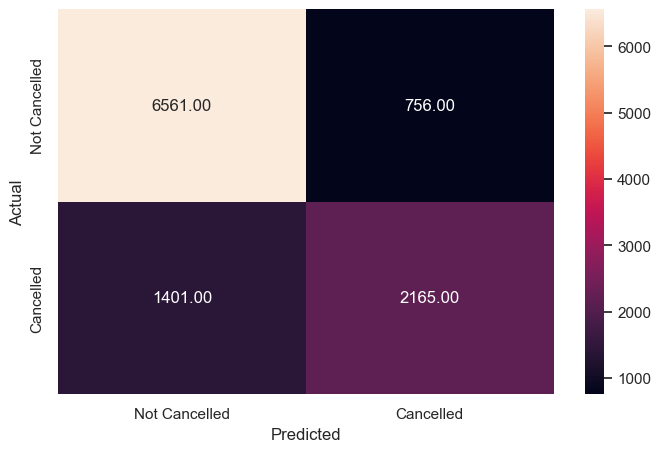

In [54]:
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

In [55]:
cm_test_dt = confusion_matrix(y_test, y_pred_test_svm)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.6071228266965788
False Positive Rate (FPR): 0.1033210332103321


**
SVM model with linear kernel is not overfitting as the accuracy is around 80% for test dataset
The Recall for the model is around 61% implying that our model will not correctly predict guests who cancel or do not cancel the booking.
**


#### ** Finding the optimal threshold for the model using the Precision-Recall Curve.**


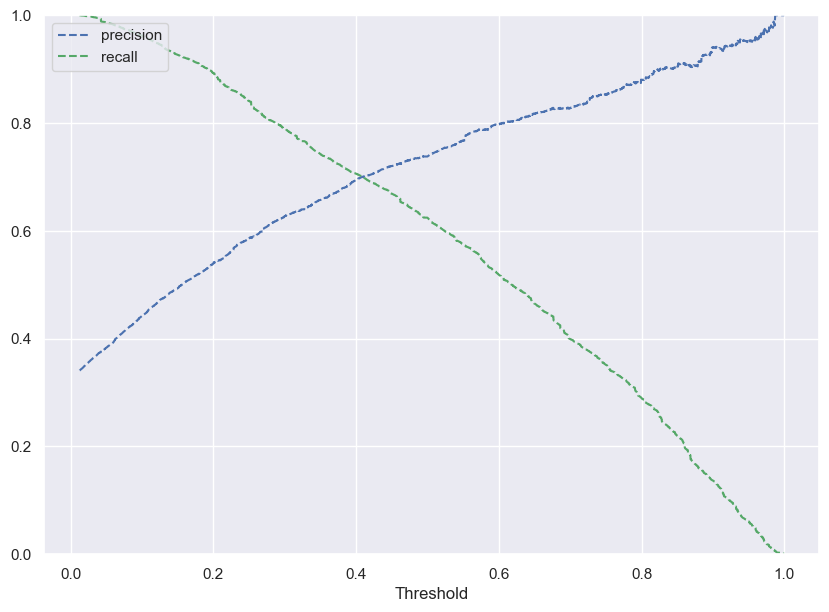

In [56]:
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

0.400

In [57]:
optimal_threshold_svm=0.4

#### **Checking the performance of the model on train and test data using the optimal threshold.**

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     17073
           1       0.69      0.71      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.77      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



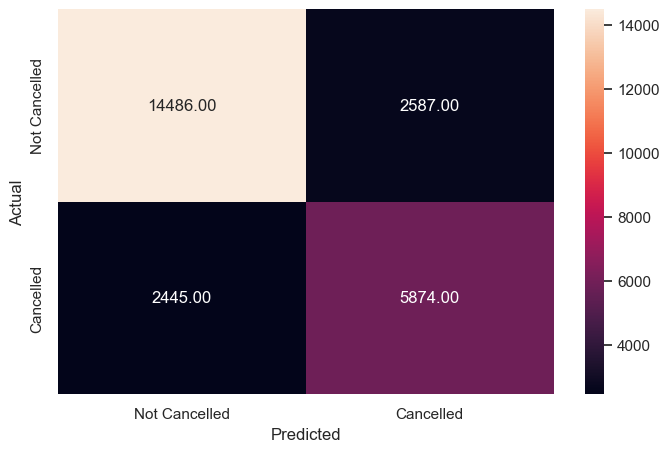

In [58]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

In [59]:
cm_train_dt = confusion_matrix(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.706094482509917
False Positive Rate (FPR): 0.15152580097229543


**
At the optimal threshold of 0.4, the model performance has improved significantly. The recall has improved from 0.61 to 0.71 which is a ~16.4% increase and the model is giving good generalized results.
As the recall is higher, this model will perform better in differentiating out guests who cancel their bookings and guests who do not cancel.
**


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7317
           1       0.68      0.71      0.69      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



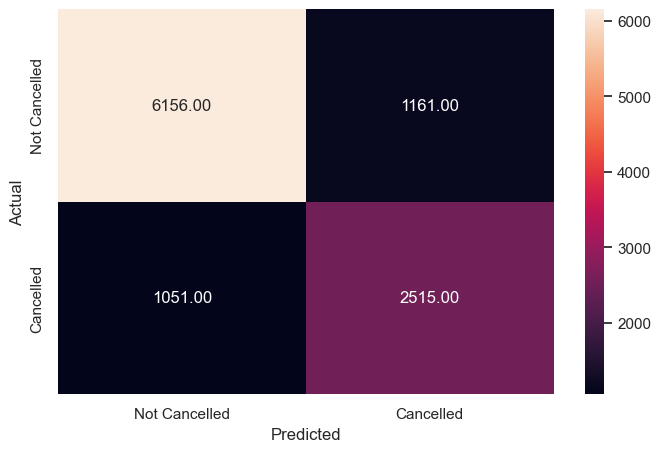

In [60]:
y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

In [61]:
cm_test_dt = confusion_matrix(y_test, y_pred_test[:,1]>optimal_threshold_svm)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.7052720134604599
False Positive Rate (FPR): 0.15867158671586715


**
At the optimal threshold of 0.4, the model performance has improved significantly. The recall has improved from 0.61 to 0.71 which is a ~16.4% increase and the model is giving good generalized results.
As the recall is higher, this model will perform better in differentiating out guests who cancel their bookings and guests who do not cancel.
**


#### **Build a Support Vector Machines model using an RBF kernel**

In [62]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)

SVC(probability=True)

#### **Checking the performance of the model on train and test data**



              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17073
           1       0.79      0.65      0.71      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.78      0.80     25392
weighted avg       0.82      0.83      0.82     25392



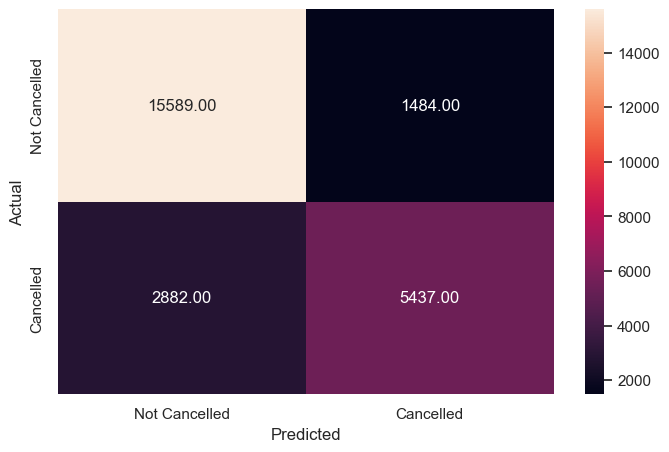

In [63]:
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

In [64]:
cm_train_dt = confusion_matrix(y_train, y_pred_train_svm)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.6535641303041231
False Positive Rate (FPR): 0.08692086920869209


**
when comparing to the baseline svm model with linear kernal,the model's performance on training data has been slightly improved by using RBF kernal
**


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7317
           1       0.78      0.63      0.70      3566

    accuracy                           0.82     10883
   macro avg       0.81      0.77      0.78     10883
weighted avg       0.82      0.82      0.81     10883



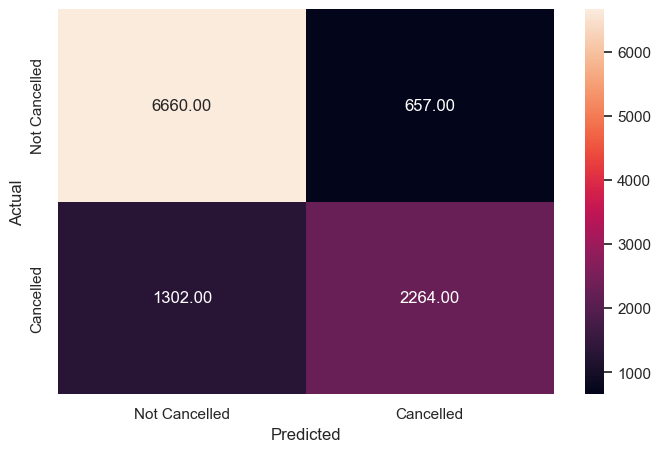

In [65]:
y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

In [66]:
cm_test_dt = confusion_matrix(y_test, y_pred_test)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.6348850252383623
False Positive Rate (FPR): 0.0897908979089791


**
the recall score on testing data has changed to 63%
**


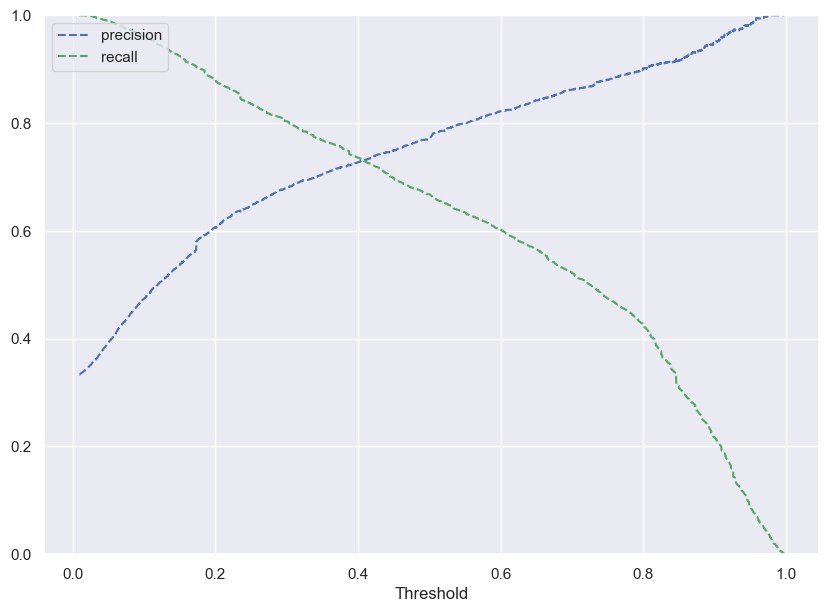

In [67]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [68]:
optimal_threshold_svm=0.4

#### **Check the performance of the model on train and test data using the optimal threshold.**

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     17073
           1       0.69      0.71      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.77      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



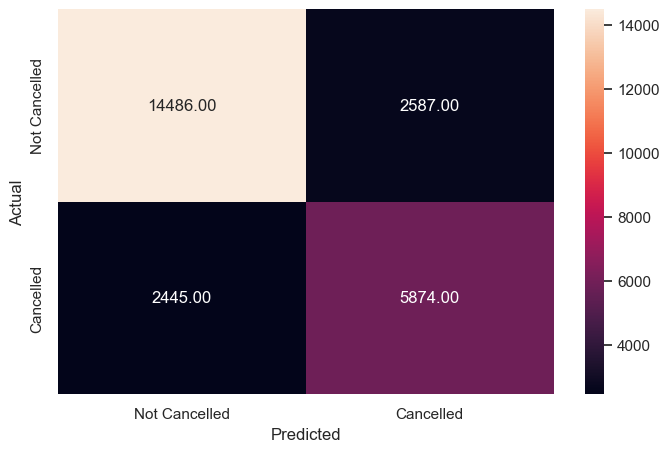

In [69]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

In [70]:
cm_train_dt = confusion_matrix(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.706094482509917
False Positive Rate (FPR): 0.15152580097229543


**
SVM model with RBF kernal is performing better compared to linear kernal.
the model has a recall score of 0.71 but the precision dropped to 0.69.
the model gives a better recall score with the threshold of 0.4 compared to the intial model.
**


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7317
           1       0.72      0.73      0.72      3566

    accuracy                           0.82     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.82      0.82      0.82     10883



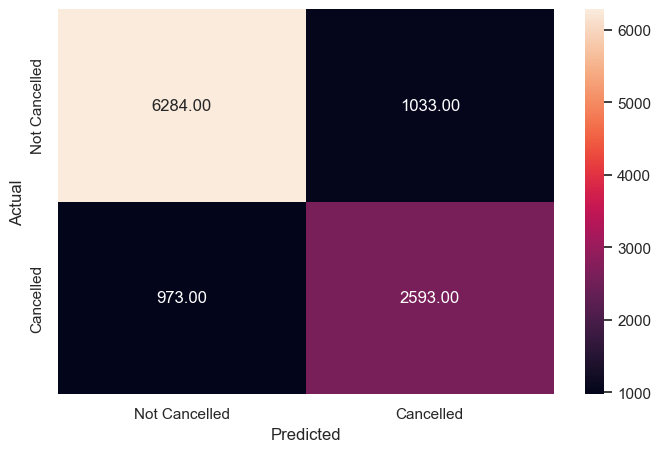

In [71]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

In [72]:
cm_test_dt = confusion_matrix(y_test, y_pred_test[:,1]>optimal_threshold_svm)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.7271452607964105
False Positive Rate (FPR): 0.14117807844745114


**
The recall score for the model is 73%,with the optimal threshold of 0.4 the
model performs better.This is the best performace so far when compared to the svm with linear kernal and logistic regression in question 3.it is better as it provides good recall and not a big drop in precision.

**


### **Decision Trees**

#### **Build a Decision Tree Model**

In [73]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### ** Check the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



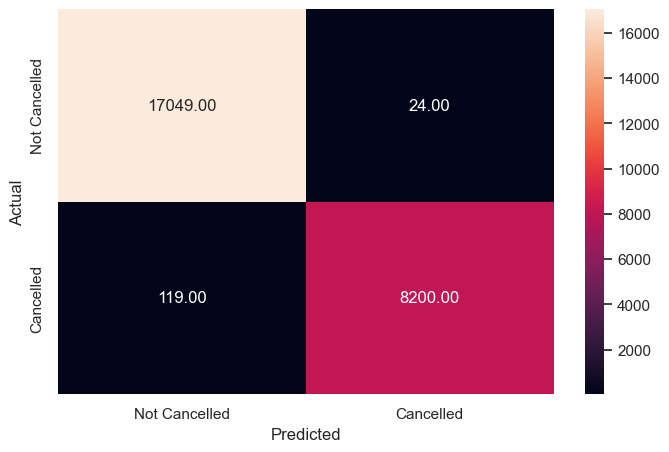

In [74]:
# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

In [75]:
cm_train_dt = confusion_matrix(y_train, pred_train_dt)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.9856953960812598
False Positive Rate (FPR): 0.0014057283429977157


**
The model seems to be performing well with the training data set as almost every sample id classified correctly.Very high f1-score,true positive rate and a very low false positive rate. The decision tree will grow and classify each data point correctly with no restricitions trees learn all the pattern avaailable in the dataset.**


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7317
           1       0.79      0.79      0.79      3566

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



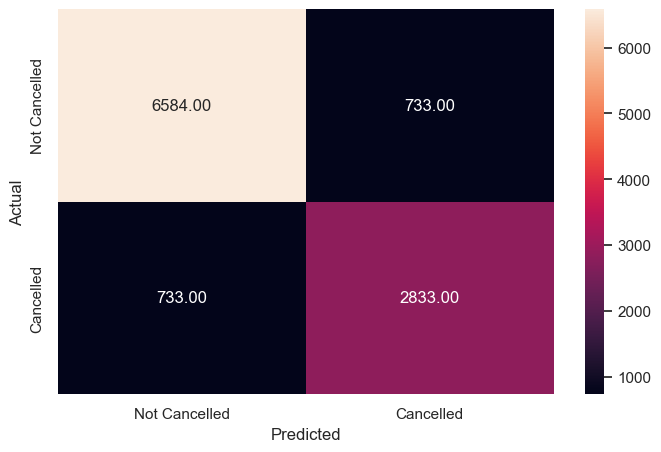

In [76]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

In [77]:
cm_test_dt = confusion_matrix(y_test, pred_test_dt)

# Extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.7944475602916433
False Positive Rate (FPR): 0.1001776684433511


**
The decision tree model is cleary overfitting.However the decision tree has better performance to logistic regression and svm models.Hence will have to tune the decision tree to reduce the overfittting.
**


 #### **Perform hyperparameter tuning for the decision tree model using GridSearch CV**

In [78]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### **Checking the performance of the model on the train and test data using the tuned model**

#### Checking performance on the training set 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17073
           1       0.82      0.68      0.75      8319

    accuracy                           0.85     25392
   macro avg       0.84      0.81      0.82     25392
weighted avg       0.85      0.85      0.84     25392



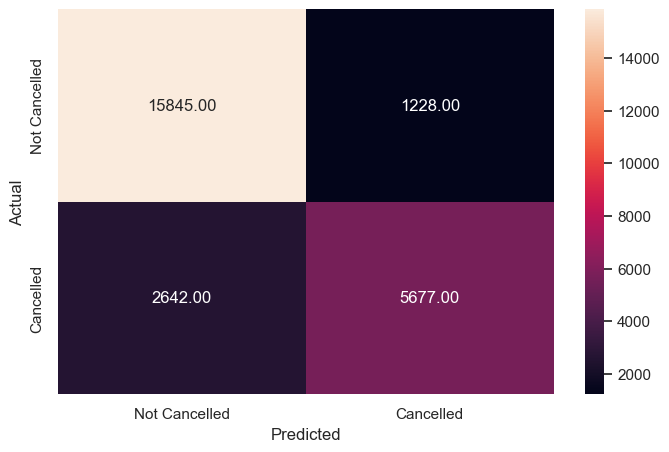

In [79]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

In [80]:
cm_train_dt = confusion_matrix(y_train, dt_tuned)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.6824137516528429
False Positive Rate (FPR): 0.07192643355004978


**
Decision tree model with default parameters is overfitting with the training data and is not able to generalize the data,but tuned had better generalized performance and good precision and recall. This still has some overfitting and model performance on test data has not really improved.
**


              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7317
           1       0.82      0.67      0.74      3566

    accuracy                           0.84     10883
   macro avg       0.84      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883



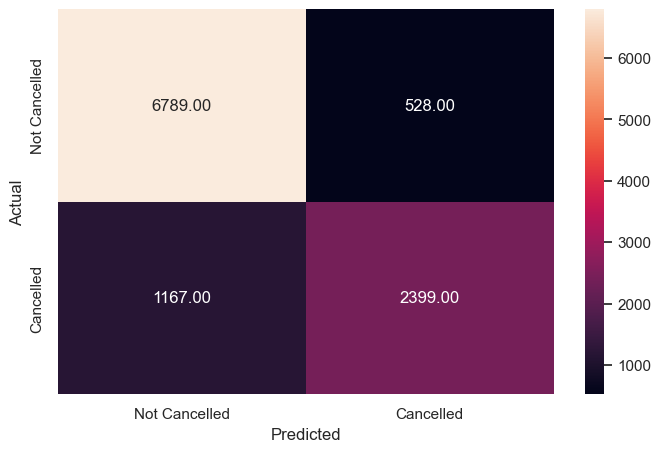

In [81]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

In [82]:
cm_test_dt = confusion_matrix(y_test,y_pred_tuned)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.6727425687044307
False Positive Rate (FPR): 0.07216072160721607


**
Same result for the test data as well.Decision tree model with default parameters is overfitting with the training data and is not able to generalize the data,but tuned had better generalised performance and good precision and recall. this still has some overfitting and model performance on test data has not really improved.
**


#### **Visualizing the Decision Tree**

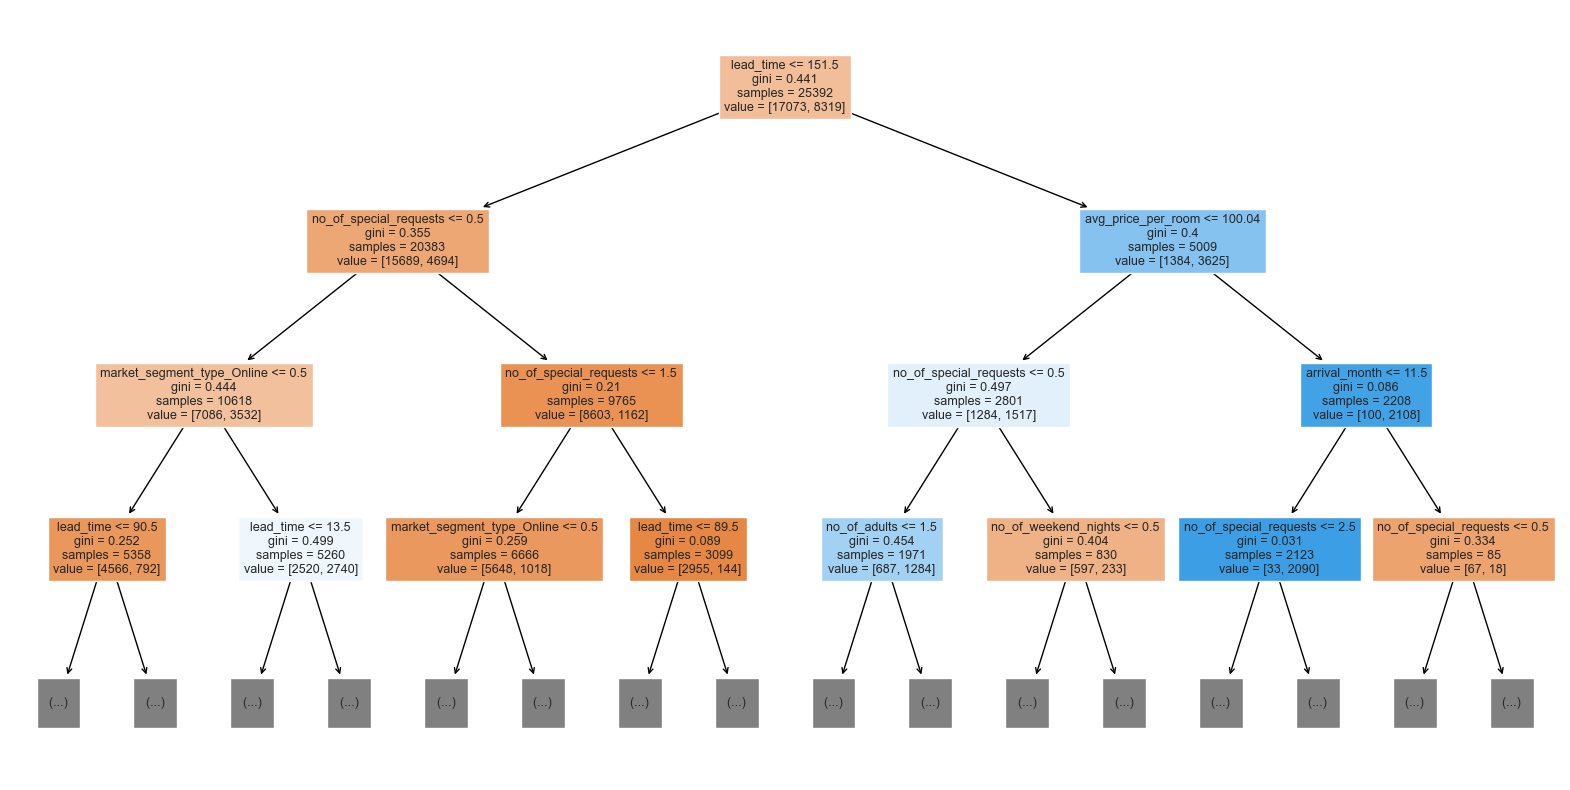

In [83]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**What are some important features based on the tuned decision tree?**

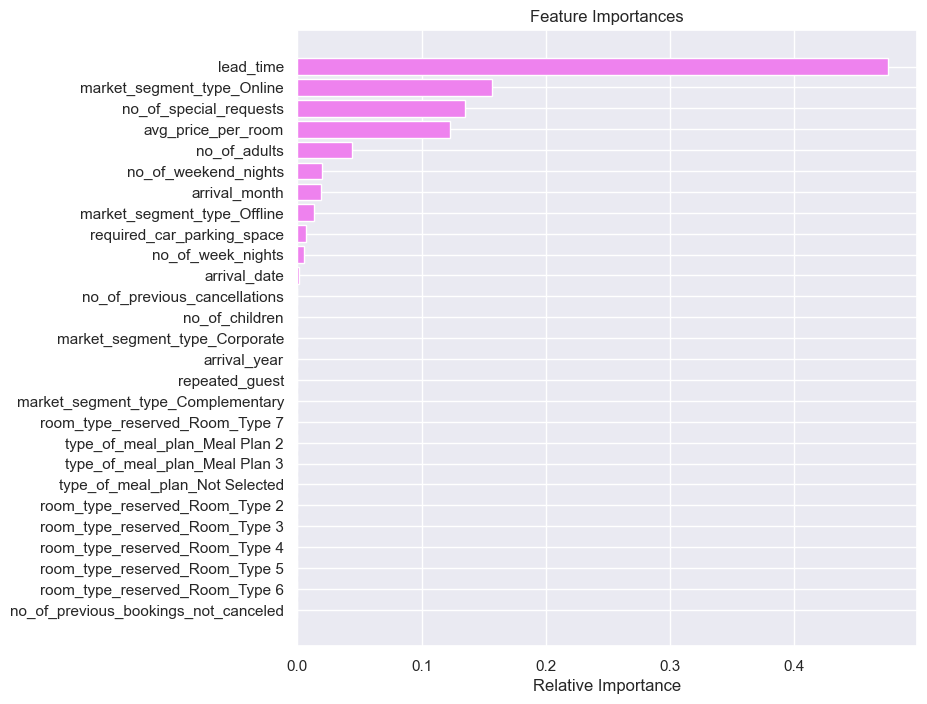

In [84]:
# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**
The most important features are lead_time, market_segment_type_online and number of special requests.
**


___

### **Random Forest**

#### ** Building a Random Forest Model**

In [85]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### **Checking the performance of the model on the train and test data**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



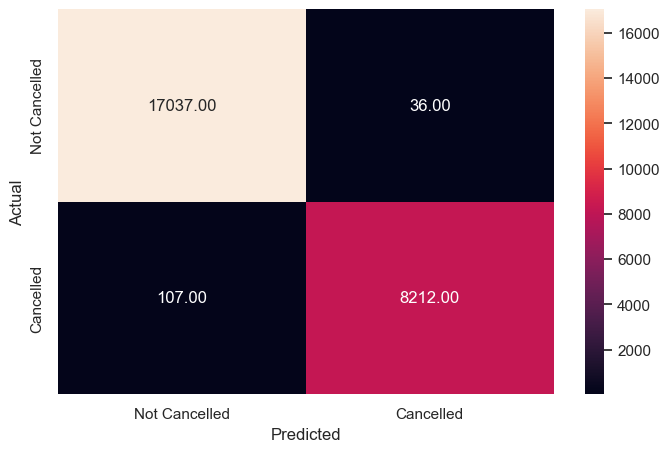

In [86]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

In [87]:
cm_train_dt = confusion_matrix(y_train, y_pred_train_rf)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.9871378771486957
False Positive Rate (FPR): 0.0021085925144965737


**
Very little errors on the training set,as the sample is being classified correctly and the model is performing well.
**


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



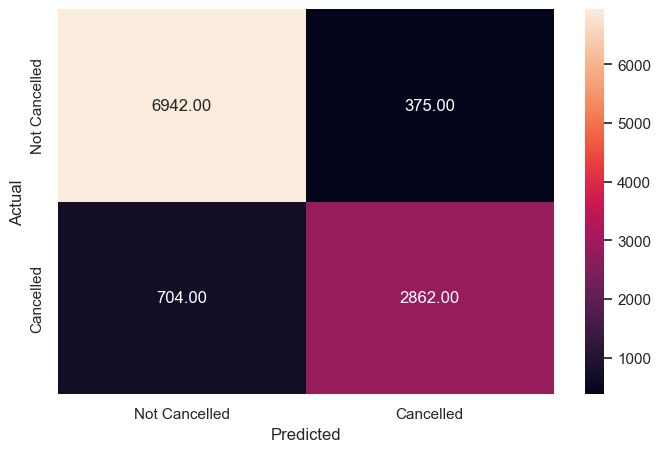

In [88]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [89]:
cm_test_dt = confusion_matrix(y_test,y_pred_test_rf)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.8025799214806506
False Positive Rate (FPR): 0.05125051250512505


**
the model is overfitting with the recall score at 0.80 at class 1.the recall on training data is 0.99.precision is not as high for the test data compared to the training data.we have to reduce overfitting and improve the recall by hyperparameter tuning.
**


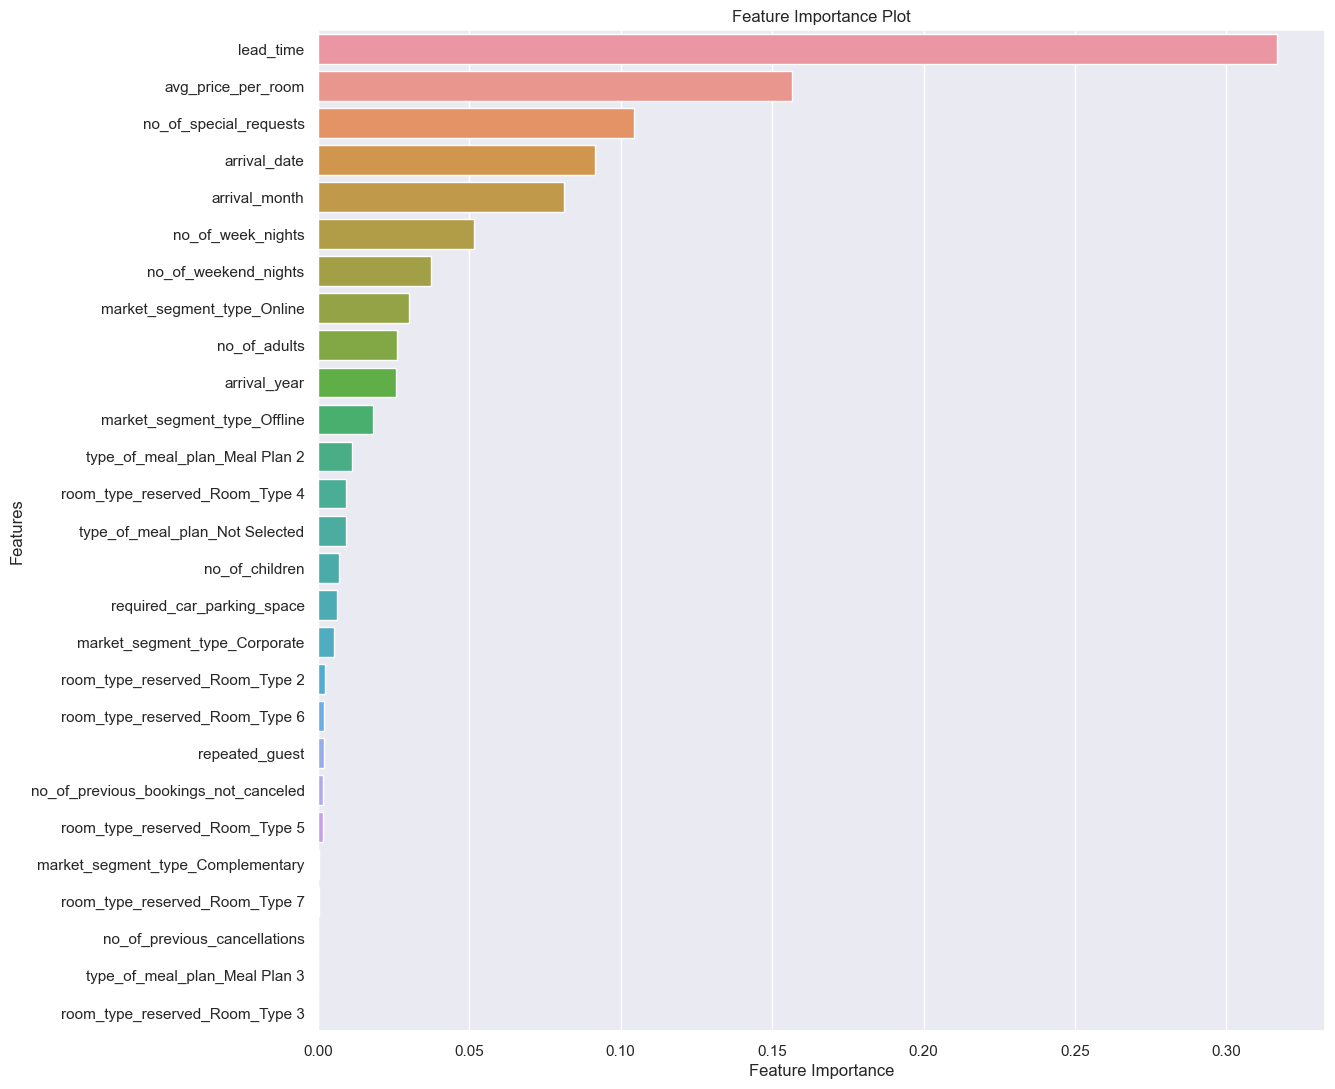

In [90]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

**
The random forest verifies the result that the most important results are lead_time  and number of special requests but not online market segment type.lead_time is the most important.
**


# Addressing class imbalance


0    0.5
1    0.5
Name: booking_status, dtype: float64


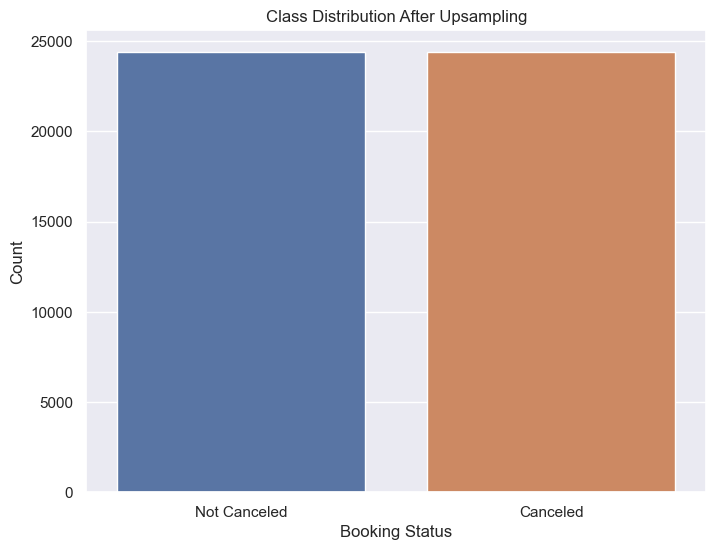

In [91]:
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Separate majority (0) and minority (1) classes
class_not_canceled = data[data["booking_status"] == 0]
class_canceled = data[data["booking_status"] == 1]

# Upsample minority class to match majority class
class_canceled_upsampled = resample(class_canceled,
                                    replace=True,                      # Sample with replacement
                                    n_samples=len(class_not_canceled), # Match majority class size
                                    random_state=42)                  # For reproducibility

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([class_not_canceled, class_canceled_upsampled])

# Verify class distribution after upsampling
print(data_upsampled["booking_status"].value_counts(normalize=True))

# Visualize class distribution after upsampling with custom labels
plt.figure(figsize=(8, 6))
sns.countplot(x="booking_status", data=data_upsampled)
plt.title("Class Distribution After Upsampling")
plt.xlabel("Booking Status")
plt.ylabel("Count")

# Customize x-axis tick labels
plt.xticks(ticks=[0, 1], labels=["Not Canceled", "Canceled"])

plt.show()

# Separate features (XX) and target variable (YY)
XX = data_upsampled.drop(["booking_status"], axis=1)  
YY = data_upsampled["booking_status"]

# Apply one-hot encoding to the features
XX = pd.get_dummies(XX, drop_first=True)

# Now XX contains the features after upsampling and one-hot encoding


Up till now, we have used 4 different models to predict the cancellation patterns of guests. Out of the 4 models, the Random Forest Model was the best model. There was a class imabalance leading to possible bias towards the majority class which was the 'Cancelled' class. Therefore to address class imbalance, we have done upsampling. We will now use the Random Forest Model to view if there are any changes to the predictive performance.

In [92]:
XX = data_upsampled.drop(["booking_status"], axis=1)
YY = data_upsampled["booking_status"]

XX = pd.get_dummies(XX, drop_first=True) # Encoding the Categorical features

In [93]:
# Splitting the upsampled data into 70% train and 30% test
X1_train, X1_test, Y1_train, Y1_test = train_test_split(XX, YY, test_size=0.30,stratify=YY, random_state=1)

**Building the Random Forest model on Upsampled data**

In [94]:
rf_estimator1 = RandomForestClassifier( random_state = 1)

rf_estimator1.fit(X1_train, Y1_train)

RandomForestClassifier(random_state=1)

**Checking Performance of the model**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17073
           1       0.99      0.99      0.99     17073

    accuracy                           0.99     34146
   macro avg       0.99      0.99      0.99     34146
weighted avg       0.99      0.99      0.99     34146



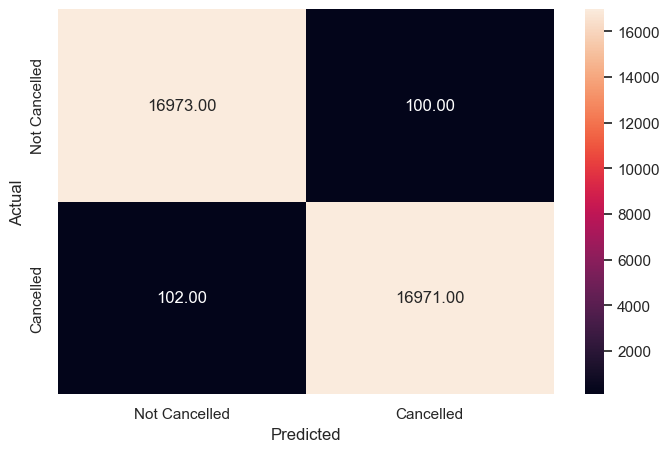

In [95]:
#On Train Set
Y1_pred_train_rf = rf_estimator1.predict(X1_train)

metrics_score(Y1_train, Y1_pred_train_rf)

In [96]:
cm_train_dt = confusion_matrix(Y1_train, Y1_pred_train_rf)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm_train_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_train_dt = tp / (tp + fn)
fpr_train_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_train_dt)
print("False Positive Rate (FPR):", fpr_train_dt)

True Positive Rate (TPR): 0.9940256545422597
False Positive Rate (FPR): 0.0058572014291571484


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7317
           1       0.93      0.96      0.94      7317

    accuracy                           0.94     14634
   macro avg       0.94      0.94      0.94     14634
weighted avg       0.94      0.94      0.94     14634



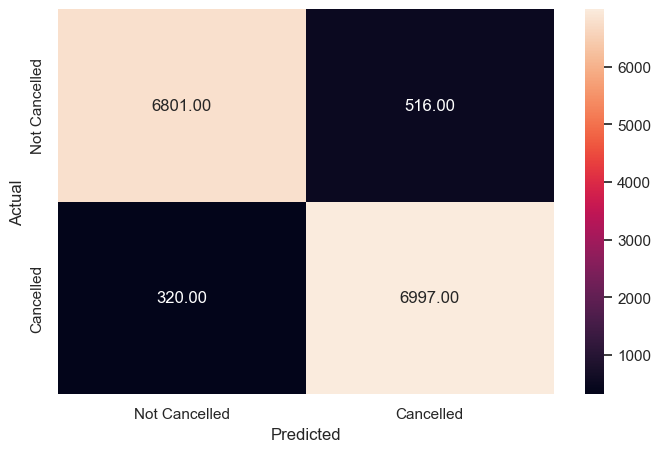

In [97]:
#On Test Set
Y1_pred_test_rf = rf_estimator1.predict(X1_test)

metrics_score(Y1_test, Y1_pred_test_rf)

In [98]:
cm_test_dt = confusion_matrix(Y1_test, Y1_pred_test_rf)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
tn, fp, fn, tp = cm_test_dt.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
tpr_test_dt = tp / (tp + fn)
fpr_test_dt = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr_test_dt)
print("False Positive Rate (FPR):", fpr_test_dt)

True Positive Rate (TPR): 0.95626622932896
False Positive Rate (FPR): 0.07052070520705207


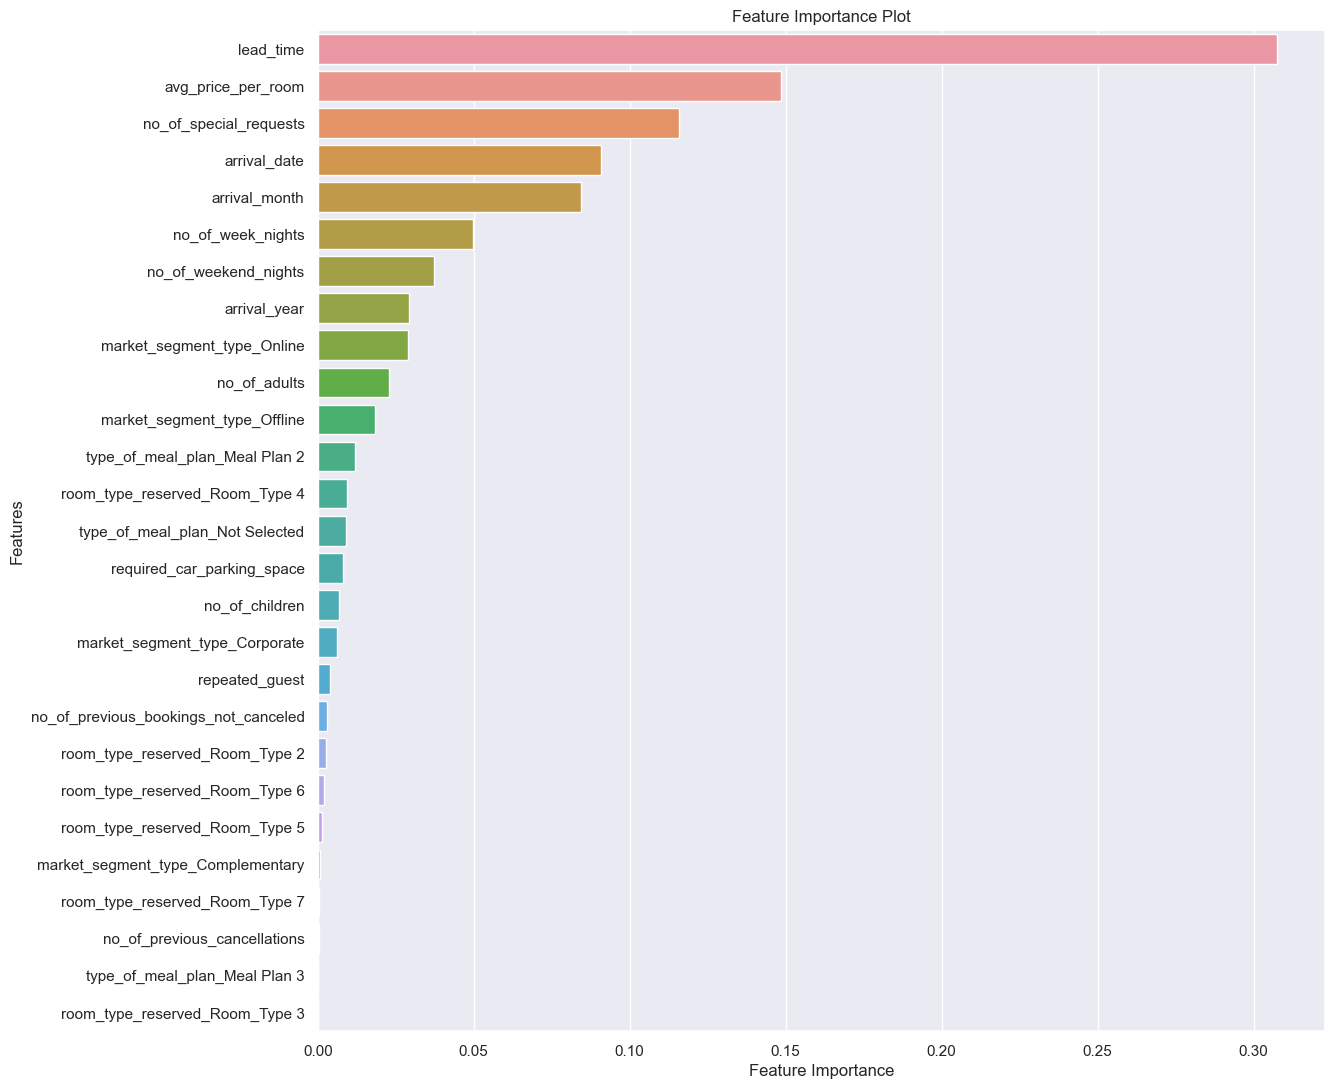

In [99]:
importances1 = rf_estimator1.feature_importances_

columns = XX.columns

importance1_df = pd.DataFrame(importances1, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(13, 13))
sns.barplot(x=importance1_df['Importance'], y=importance1_df.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [100]:
# Define the data for the table
data = {
    'Model': ['Logistic Regression', 'SVM (Linear Kernel)', 'SVM (RBF Kernel)', 'Decision Tree', 'Random Forest', 'Random Forest (Upsampled)'],
    'Precision (Train)': [0.69, 0.69, 0.82, 1.00, 0.99, 0.99],
    'Recall (Train)': [0.68, 0.71, 0.68, 0.99, 0.99, 0.99],
    'F1-score (Train)': [0.68, 0.70, 0.75, 0.99, 0.99, 0.99],
    'Precision (Test)': [0.68, 0.72, 0.82, 0.88, 0.93, 0.93],
    'Recall (Test)': [0.67, 0.73, 0.67, 0.80, 0.96, 0.96],
    'F1-score (Test)': [0.67, 0.72, 0.74, 0.84, 0.94, 0.94]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                       Model  Precision (Train)  Recall (Train)  \
0        Logistic Regression               0.69            0.68   
1        SVM (Linear Kernel)               0.69            0.71   
2           SVM (RBF Kernel)               0.82            0.68   
3              Decision Tree               1.00            0.99   
4              Random Forest               0.99            0.99   
5  Random Forest (Upsampled)               0.99            0.99   

   F1-score (Train)  Precision (Test)  Recall (Test)  F1-score (Test)  
0              0.68              0.68           0.67             0.67  
1              0.70              0.72           0.73             0.72  
2              0.75              0.82           0.67             0.74  
3              0.99              0.88           0.80             0.84  
4              0.99              0.93           0.96             0.94  
5              0.99              0.93           0.96             0.94  


In [108]:
import pandas as pd

# Define the data for the table
data_fpr_tpr = {
    'Model': ['Logistic Regression', 'SVM (Linear Kernel)', 'SVM (RBF Kernel)', 'Decision Tree', 'Random Forest', 'Random Forest (Upsampled)'],
    'True Positive Rate(Train)': [0.68, 0.71, 0.71, 0.68, 0.99, 0.99],
    'False Positive Rate(Train)': [0.15, 0.15, 0.15, 0.07, 0.002, 0.006],
    'True Positive Rate(Test)': [0.67, 0.71, 0.73, 0.67, 0.80, 0.96],
    'False Positive Rate(Test)': [0.15, 0.16, 0.14, 0.07, 0.05, 0.07]  # Corrected the typo here
}

# Create a DataFrame from the data
df_fpr_tpr = pd.DataFrame(data_fpr_tpr)

# Print the DataFrame
print(df_fpr_tpr)



                       Model  True Positive Rate(Train)  \
0        Logistic Regression                       0.68   
1        SVM (Linear Kernel)                       0.71   
2           SVM (RBF Kernel)                       0.71   
3              Decision Tree                       0.68   
4              Random Forest                       0.99   
5  Random Forest (Upsampled)                       0.99   

   False Positive Rate(Train)  True Positive Rate(Test)  \
0                       0.150                      0.67   
1                       0.150                      0.71   
2                       0.150                      0.73   
3                       0.070                      0.67   
4                       0.002                      0.80   
5                       0.006                      0.96   

   False Positive Rate(Test)  
0                       0.15  
1                       0.16  
2                       0.14  
3                       0.07  
4                

Clearly Random forest has the best metrics overall with a higher True Positive rate than not upsampled Rndom forest model, with the Upsampled model having very little difference in other metrics.

# Conclusion


This model can be used to predict the cancellation pattern of guests, which may result in a result in loss of revenue and
incremental cost for the Hotel for its last minute marketing efforts.

We have found the Lead Time,Market Segment type_online and number of Special request along with the average price of the room are the most important variables in predicting the guest booking cancelation pattern.

We should be looking at bookings with a lead time of very high values as they have a high probability of being cancelled.

If this is the case, it is important to pay attention to the number if special requests as a higher number of requests means a greater probability that they might not cancel.

We can also turn to whether the market segment type was online as they have a high level of cancellation.


Note : A version of this has been uploaded to Kaggle under the username _Ponmurugu Thangatharun(one of the mini-project members), this note is to disperse any concerns of plagiarism .